<a href="https://colab.research.google.com/github/respwill/disaster_tweet/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("./drive/MyDrive/ColoradoBoulder/Machine Learning/Deep learning/week4/nlp-getting-started/train.csv")

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Number of records
Total records: 7613  
Null keyword: 61  (0.8% is missing)  
Null location: 2533 (33.3% is missing)

It may be better to remove records that has no keyword.  
I will look into keyword column later.  

In [ ]:
n_records = train_data.shape[0]
n_records

7613

In [ ]:
n_miss_key = train_data[train_data['keyword'].isnull()].shape[0]
print(f"Missing keyword records: {n_miss_key}, proportion:{n_miss_key / n_records * 100:.1f} %")

Missing keyword records: 61, proportion:0.8 %


In [ ]:
n_miss_loc = train_data[train_data['location'].isnull()].shape[0]
print(f"Missing location records: {n_miss_loc}, proportion:{n_miss_loc / n_records * 100:.1f} %")

Missing location records: 2533, proportion:33.3 %


## Duplicated data
61 tweets are duplicated in dataset

In [ ]:
train_data[train_data[['keyword','location','text']].duplicated()]

,id,keyword,location,text,target
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0
...,...,...,...,...,...
6377,9113,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6378,9114,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6449,9225,suicide%20bombing,NaN,'Suicide bombing at [location named]...' #prem...,1


remove duplicated data

In [ ]:
train_data = train_data[~train_data[['keyword','location','text']].duplicated()]

In [ ]:
train_data.shape

(7552, 5)

# Label
It is binary labels and label 0 is about 15%p more than label 1.  
So it is a bit unbalnced dataset, I will make it balnaced dataset after cleaning features

In [ ]:
train_data['target'].value_counts()

target
0    4316
1    3236
Name: count, dtype: int64

In [ ]:
train_data['target'].value_counts(normalize=True)

target
0    0.571504
1    0.428496
Name: proportion, dtype: float64

# Keyword

222 types of keywords exists  
some keywords has %20 in the middle of text, and it seems that it means white space.  
I will convert it to white space and lemetize them to simplify data.  

In [ ]:
train_data['keyword'].unique(), len(train_data['keyword'].unique())

(array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
        'ambulance', 'annihilated', 'annihilation', 'apocalypse',
        'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
        'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
        'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
        'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
        'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
        'buildings%20burning', 'buildings%20on%20fire', 'burned',
        'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
        'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
        'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
        'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
        'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
        'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       

To reduce duplicated data, let's remitize the keywords

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# fill na
train_data['keyword'] = train_data['keyword'].fillna('')
# convert %20 into white space
train_data['keyword'] = train_data['keyword'].str.replace('%20', ' ')

Lemmatize the keywords

In [ ]:
train_data['keyword_lem'] = train_data['keyword'].apply(lambda x: lemmatizer.lemmatize(x))

In [ ]:
train_data['keyword_lem'].unique(), len(train_data['keyword_lem'].unique())

(array(['', 'ablaze', 'accident', 'aftershock', 'airplane accident',
        'ambulance', 'annihilated', 'annihilation', 'apocalypse',
        'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
        'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
        'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
        'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
        'bomb', 'bombed', 'bombing', 'bridge collapse',
        'buildings burning', 'buildings on fire', 'burned', 'burning',
        'burning buildings', 'bush fires', 'casualty', 'catastrophe',
        'catastrophic', 'chemical emergency', 'cliff fall', 'collapse',
        'collapsed', 'collide', 'collided', 'collision', 'crash',
        'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
        'danger', 'dead', 'death', 'debris', 'deluge', 'deluged',
        'demolish', 'demolished', 'demolition', 'derail', 'derailed',
        'derailment', 'desolate', 'des

In [ ]:
key_pivot = pd.pivot_table(train_data[['keyword_lem','id','target']], index='keyword_lem', columns='target', aggfunc='count')
key_pivot = key_pivot.fillna(0)

In [ ]:
key_pivot.sort_values(by=('id',0), ascending=False)

id      
target              0     1
keyword_lem                
siren            57.0  12.0
injury           50.0  18.0
weapon           47.0  31.0
fatality         46.0  36.0
body bags        40.0   1.0
...               ...   ...
suicide bomber    1.0  30.0
suicide bombing   1.0  31.0
debris            0.0  37.0
wreckage          0.0  39.0
derailment        0.0  35.0

[214 rows x 2 columns]

The ratio of labels is different by keyword.  
It means keyword is definetly proper feature to predict labels.

<Axes: xlabel='keyword_lem'>

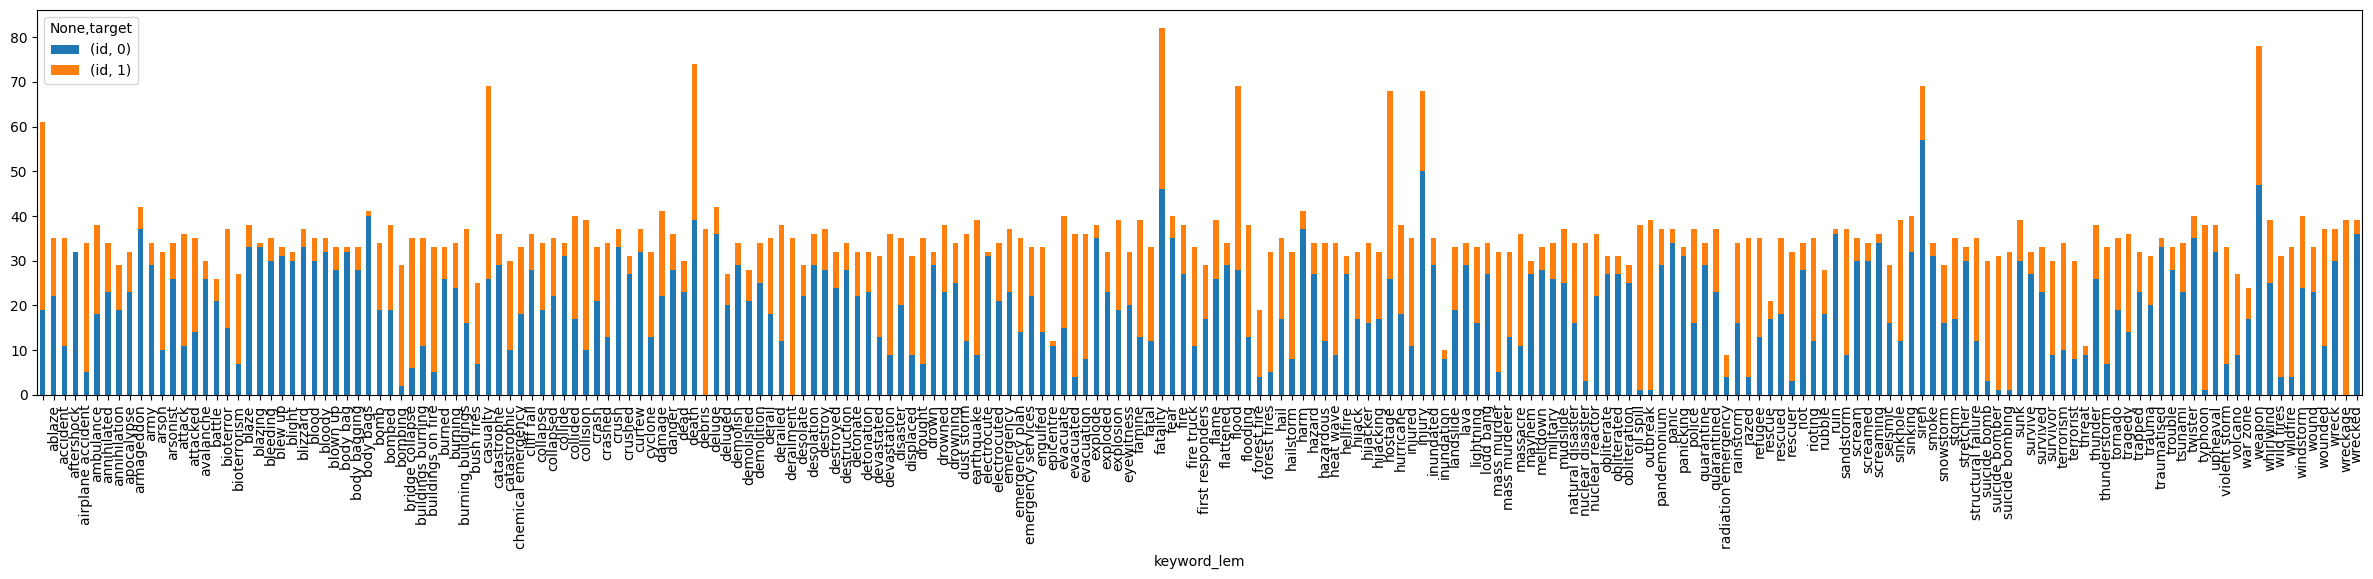

In [ ]:
key_pivot.plot(kind='bar', stacked=True, figsize=(30,5))

# Location

3342 unique locations exists in the dataset.  
The data is not formatted, it seems they are randomly written data.  

Cases:  
- e-mail
- web address
- coordinates
- instagram
- Phone number

I will perform some clearning on this location feature.  
- removing special characters
- removing single character
- removing white spaces
- removing web address prefix and suffix
- replacing digits into #

In [ ]:
train_data['location'].unique(), len(train_data['location'].unique())

(array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
        'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object),
 3342)

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
import re
import numpy as np
import math

In [ ]:
remove_special = re.compile("[.;:!\'?,\"()\[\]<>%#\^&=\$\#\\/*\-\+\|\@\~\{\}]")

Remove stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  words = word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def loc_prep(data):
    # make lower case
    data = data.lower()
    # remove special characters above
    data = remove_special.sub(' ', data)
    # remove long white space into one white space
    data = re.sub(' +', ' ', data)
    # remove one character
    data = re.sub(r'\b[a-zA-Z]\b', '', data)
    # remove leading and trailing white space
    data = data.strip()
    return data

In [ ]:
def clean_numbers(data):
    data = re.sub('[0-9]{5,}', '#'*5, data)
    data = re.sub('[0-9]{4}', '#'*4, data)
    data = re.sub('[0-9]{3}', '#'*3, data)
    data = re.sub('[0-9]{2}', '#'*2, data)
    data = re.sub('[0-9]{1}', '#', data)
    return data

In [ ]:
# remove part of the internet address such as www com
def remove_internet_address(data):
    data = re.sub(r'http\s+', '', data)
    data = re.sub(r'www\s+', '', data)
    data = re.sub(r'https\s+', '', data)
    data = re.sub(r'\S+com\s+', '', data)
    data = data.strip()
    return data

In [ ]:
def remove_somewhere(data):
    data = re.sub(r'somewhere\s+', '', data)
    data = data.strip()
    return data

In [ ]:
train_data['location'] = train_data['location'].fillna('')

In [ ]:
train_data['location_prep'] = train_data['location'].apply(remove_stopwords)

In [ ]:
train_data['location_prep'] = train_data['location_prep'].apply(loc_prep)

In [ ]:
train_data['location_prep'] = train_data['location_prep'].apply(clean_numbers)

In [ ]:
train_data['location_prep'] = train_data['location_prep'].apply(remove_internet_address)

In [ ]:
train_data['location_prep'] = train_data['location_prep'].apply(remove_somewhere)

In [ ]:
train_data[['location_prep']].drop_duplicates().sort_values(by='location_prep')

,location_prep
0,
4721,#
6325,# #
1003,# # # slopelousas # # #
5978,# # ##
4164,# # access rt link please
486,# # blam squad
6219,# ## ## # ## ## # ## ##
7471,# ## taron squad
5861,# ### miles away


Eventhough I cleaned the data, location data is not accurate still.  
Since many of them is not actual place and sometime they are meaningless words.  
It would be better to focus on keywords and text.  
Or It might be better to concatenate the with text.  

In [ ]:
loc_pivot = pd.pivot_table(train_data[['location_prep','id','target']], index='location_prep', columns='target', aggfunc='count')
loc_pivot = loc_pivot.fillna(0)

location does not separate labels properly

In [ ]:
loc_pivot.sort_values(by=('id',0), ascending=False).loc[loc_pivot[('id',0)]>=10]

id        
target                      0       1
location_prep                        
                       1476.0  1094.0
new york                 59.0    18.0
usa                      40.0    67.0
london                   33.0    18.0
united states            23.0    27.0
los angeles ca           20.0     8.0
###                      18.0     1.0
canada                   18.0    19.0
kenya                    16.0     5.0
everywhere               15.0     8.0
uk                       14.0    17.0
worldwide                14.0    18.0
california               12.0     9.0
texas                    11.0     3.0
florida                  11.0     3.0
new york ny              11.0     7.0
nyc                      11.0     4.0
chicago il               10.0    11.0
ìït ## ##### ## #####    10.0     5.0
ss                       10.0     1.0
united kingdom           10.0     4.0

# Text
I referenced 'https://www.kaggle.com/code/rohitgarud/all-almost-data-preprocessing-techniques-for-nlp' to preprocessed text data.

In [ ]:
pd.set_option('display.max_colwidth', None)

Needs to be cleaned up   
* 'urls'
* 'mention'
* 'tags',
* abbreviation
* HTML

In [ ]:
train_data[['text']].sample(3)

,text
6878,I'm so traumatised.
3911,when fizzy is sitting in the regular flood seats ...... and no one knows who she is.....
135,Anyone need a P/U tonight? I play Hybrid Slayer ps4 EU. HMU @Cod8sandscrims @EmpirikGaming @CoDAWScrims @4TP_KOTC @4TPFA @afterShock_Org


### lower case

In [ ]:
train_data['text_lower'] = train_data['text'].str.lower()

### contractions  
expand contractions such as can't -> can not

In [ ]:
!pip install contractions -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.1 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
train_data['text_noContractions'] = train_data['text_lower'].apply(contractions.fix)

In [ ]:
train_data.loc[train_data['text_lower'].str.contains("can't"), ['text_lower', 'text_noContractions']].sample(3)

,text_lower,text_noContractions
6524,@ddnewslive @nitishkumar and @arvindkejriwal can't survive without referring @@narendramodi . without mr modi they are big zeros,@ddnewslive @nitishkumar and @arvindkejriwal cannot survive without referring @@narendramodi . without mr modi they are big zeros
6817,@onihimedesu the whole city is trapped! you can't leave the city! this was supposed to be a normal sports manga wit a love triangle (c),@onihimedesu the whole city is trapped! you cannot leave the city! this was supposed to be a normal sports manga wit a love triangle (c)
2896,just down drown me k i can't swim https://t.co/sjoeing76t,just down drown me k i cannot swim https://t.co/sjoeing76t


### urls  

In [ ]:
def rem_urls(data):
    regex = re.compile(f"https?://(www\.)?(\w+)(\.\w+)(/\w*)?")
    data = re.sub(regex, "", data)
    return data

In [ ]:
train_data['text_noURLs'] = train_data['text_noContractions'].apply(rem_urls)

In [ ]:
train_data.loc[train_data['text_noContractions'].str.contains('http'), ['text_noContractions', 'text_noURLs']].sample(3)

,text_noContractions,text_noURLs
938,loner diaries.\n\nthe patterns on the sand\nmay have been blown away.\nthe photos in twos\nall choked up in flames.... http://t.co/ekfaz6wvbz,loner diaries.\n\nthe patterns on the sand\nmay have been blown away.\nthe photos in twos\nall choked up in flames....
6213,[55436] 1950 lionel trains smoke locomotives with magne-traction instructions http://t.co/xezbs3sq0y http://t.co/c2x0qokgly,[55436] 1950 lionel trains smoke locomotives with magne-traction instructions
7226,i liked a @youtube video from @dannyonpc http://t.co/aauizggc9q battlefield hardline - 11 new weapons - new map - throwingknifes!,i liked a @youtube video from @dannyonpc battlefield hardline - 11 new weapons - new map - throwingknifes!


### emails
one records in train dataset has email

In [ ]:
train_data[train_data['text_noURLs'].str.contains("([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+", regex=True)]

<ipython-input-51-0fa5b0bc1ba7>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  train_data[train_data['text_noURLs'].str.contains("([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+", regex=True)]


,id,keyword,location,text,target,keyword_lem,location_prep,text_lower,text_noContractions,text_noURLs
2254,3229,deluged,Wellington,@TheSewphist whoever holds the address 'fuckface@wineisdumb.com' is going to be deluged in spam meant for me,0,deluged,wellington,@thesewphist whoever holds the address 'fuckface@wineisdumb.com' is going to be deluged in spam meant for me,@thesewphist whoever holds the address 'fuckface@wineisdumb.com' is going to be deluged in spam meant for me,@thesewphist whoever holds the address 'fuckface@wineisdumb.com' is going to be deluged in spam meant for me


In [ ]:
def rem_emails(data):
    regex = re.compile("([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+")
    data = re.sub(regex, "", data)
    return data

In [ ]:
train_data['text_noEmail'] = train_data['text_noURLs'].apply(rem_emails)

In [ ]:
train_data.loc[2254, ['text_noURLs', 'text_noEmail']]

text_noURLs     @thesewphist whoever holds the address 'fuckface@wineisdumb.com' is going to be deluged in spam meant for me
text_noEmail                           @thesewphist whoever holds the address '' is going to be deluged in spam meant for me
Name: 2254, dtype: object

### HTML

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
train_data['text_noHTML'] = train_data['text_noEmail'].apply(lambda x: BeautifulSoup(x).get_text())

<ipython-input-56-065eae8f9edd>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  train_data['text_noHTML'] = train_data['text_noEmail'].apply(lambda x: BeautifulSoup(x).get_text())


In [ ]:
train_data.loc[train_data['text_noEmail'].str.contains('&gt'), ['text_noEmail', 'text_noHTML']].sample(3)

,text_noEmail,text_noHTML
5637,@fadelurker @dalinthanelan &lt; right now.\n\neven after two years there were still refugees camped just south of redcliffe village and aidan &gt;,@fadelurker @dalinthanelan < right now.\n\neven after two years there were still refugees camped just south of redcliffe village and aidan >
306,((official vid)) #doublecups &gt;&gt; &gt;&gt; @trubgme prod @thisizbwright &gt;&gt; #armageddon,((official vid)) #doublecups >> >> @trubgme prod @thisizbwright >> #armageddon
6134,i am more into the healing/reviving side of the game rather than better attacking so for now siren &gt; all other characters (except new girl).,i am more into the healing/reviving side of the game rather than better attacking so for now siren > all other characters (except new girl).


### Mentions (@)
Tweeter uses @ to call naems of people, so it is not helpful to classify disaster  
It should be done before removing @ alone.

In [ ]:
def rem_mention(data):
    regex = re.compile('@\w+')
    data = re.sub(regex, '', data)
    return data

In [ ]:
train_data['text_noMention'] = train_data['text_noHTML'].apply(rem_mention)

In [ ]:
train_data.loc[train_data['text_noHTML'].str.contains('@\w+', regex=True), ['text_noHTML', 'text_noMention']].sample(3)

,text_noHTML,text_noMention
6288,happy birthday @lesley_mariiee ?? i miss you so much & i hope you have a great birthday!!????,happy birthday ?? i miss you so much & i hope you have a great birthday!!????
3439,@kopiteluke1892 its broken its fully exploded.,its broken its fully exploded.
1980,#rohingya houses in #kyee nockthie hamlet from taungbazar region in buthidaung were severely damaged in cyclone @kasitaroch @vivianunhcr,#rohingya houses in #kyee nockthie hamlet from taungbazar region in buthidaung were severely damaged in cyclone


### Emojis
reference says this should be discussed, and I would like to apply some emojis conversion  

In [ ]:
train_data.loc[train_data['text_noMention'].str.contains(r'\;\)', regex=True)].sample(3)

,id,keyword,location,text,target,keyword_lem,location_prep,text_lower,text_noContractions,text_noURLs,text_noEmail,text_noHTML,text_noMention
5395,7696,panicking,"Petaluma, CA",@QuotesTTG Save the panicking for when you get to Helios. ;),0,panicking,petaluma ca,@quotesttg save the panicking for when you get to helios. ;),@quotesttg save the panicking for when you get to helios. ;),@quotesttg save the panicking for when you get to helios. ;),@quotesttg save the panicking for when you get to helios. ;),@quotesttg save the panicking for when you get to helios. ;),save the panicking for when you get to helios. ;)
21,32,,,London is cool ;),0,,,london is cool ;),london is cool ;),london is cool ;),london is cool ;),london is cool ;),london is cool ;)
6896,9885,traumatised,,@EMILY4EVEREVER haha it's alright..but more than twice is just stupid ;) he's traumatised ????,0,traumatised,,@emily4everever haha it's alright..but more than twice is just stupid ;) he's traumatised ????,@emily4everever haha it is alright..but more than twice is just stupid ;) he is traumatised ????,@emily4everever haha it is alright..but more than twice is just stupid ;) he is traumatised ????,@emily4everever haha it is alright..but more than twice is just stupid ;) he is traumatised ????,@emily4everever haha it is alright..but more than twice is just stupid ;) he is traumatised ????,haha it is alright..but more than twice is just stupid ;) he is traumatised ????


In [ ]:
train_data['text_noEmoji'] = train_data['text_noMention'].str.replace(':\(', 'sadness ')

In [ ]:
train_data['text_noEmoji'] = train_data['text_noEmoji'].str.replace(r':\)[$|\s]*', 'happiness ')

In [ ]:
train_data['text_noEmoji'] = train_data['text_noEmoji'].str.replace(r'\;\)[$|\s]*', 'happiness ')

### Accent

In [ ]:
!pip install unidecode -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode

In [ ]:
def rem_accent(data):
    data = unidecode(data)
    return data

In [ ]:
train_data['text_noAccent'] = train_data['text_noEmoji'].apply(rem_accent)

### Unicode Characters
If tweet includes other languages, this approach might be wrong.

In [ ]:
def rem_unicode(data):
    data = data.encode("ascii", "ignore").decode()
    return data

In [ ]:
train_data['text_noUnicode'] = train_data['text_noAccent'].apply(rem_unicode)

### Punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def rem_punc(data):
    data = re.sub(f"[{string.punctuation}]", " ", data)
    return data

In [ ]:
train_data['text_noPunct'] = train_data['text_noUnicode'].apply(rem_punc)

In [ ]:
train_data[['text_noUnicode', 'text_noPunct']].sample(3)

,text_noUnicode,text_noPunct
6016,screams at my own mother,screams at my own mother
663,just letting you know,just letting you know
5491,reddit will now quarantine offensive content,reddit will now quarantine offensive content


### Numbers
numbers mights have some meaning, so replace them with '#'

In [ ]:
def clean_numbers(data):
    data = re.sub('[0-9]{5,}', '#'*5, data)
    data = re.sub('[0-9]{4}', '#'*4, data)
    data = re.sub('[0-9]{3}', '#'*3, data)
    data = re.sub('[0-9]{2}', '#'*2, data)
    data = re.sub('[0-9]{1}', '#', data)
    return data

In [ ]:
train_data['text_noDigit'] = train_data['text_noPunct'].apply(clean_numbers)

In [ ]:
train_data.loc[train_data['text_noPunct'].str.contains('\d'), ['text_noPunct', 'text_noDigit']].sample(3)

,text_noPunct,text_noDigit
3029,contruction upgrading ferries to earthquake standards in vashon mukilteo q13 fox earthquakenews,contruction upgrading ferries to earthquake standards in vashon mukilteo q## fox earthquakenews
5766,to all the meat loving feminists of the world riot grill has arrived oliviamiles01,to all the meat loving feminists of the world riot grill has arrived oliviamiles##
371,7 beyonce is my pick for fan army beyhive,# beyonce is my pick for fan army beyhive


### Stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def rem_stopwords(data):
    return " ".join([word for word in str(data).split() if word not in stop_words])

In [ ]:
train_data['text_noStop'] = train_data['text_noDigit'].apply(rem_stopwords)

In [ ]:
train_data[['text_noDigit', 'text_noStop']].sample(3)

,text_noDigit,text_noStop
605,fedex no longer shipping bioterror germs wxia tv,fedex longer shipping bioterror germs wxia tv
4923,are you reading right to left,reading right left
3928,iembot hfo at ## ## am # nnw hana maui co hi county official reports coastal flood u,iembot hfo ## ## # nnw hana maui co hi county official reports coastal flood u


### Extra space

In [ ]:
def rem_extra_space(data):
    data = re.sub(' +', ' ', data).strip()
    return data

In [ ]:
train_data['text_noExspace'] = train_data['text_noStop'].apply(rem_extra_space)

In [ ]:
train_data[['text_noStop', 'text_noExspace']].sample(3)

,text_noStop,text_noExspace
2425,dropping sports show think si top## would derailed,dropping sports show think si top## would derailed
5622,whao ##### nigerian refugees repatriated cameroon,whao ##### nigerian refugees repatriated cameroon
316,phone spying hidden back door nsa data mining software financial armageddon blog,phone spying hidden back door nsa data mining software financial armageddon blog


### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_data(data):
    words = [lemmatizer.lemmatize(word) for word in data.split()]
    data = ' '.join(words)
    return data

In [ ]:
train_data['text_Lemmatised'] = train_data['text_noExspace'].apply(lemmatize_data)

In [ ]:
train_data[['text_noExspace','text_Lemmatised']].sample(3)

,text_noExspace,text_Lemmatised
6375,see ##yr old pkk suicide bomber detonated bomb turkey army trenchu via,see ##yr old pkk suicide bomber detonated bomb turkey army trenchu via
505,christian attacked muslims temple mount waving israeli flag via pamela geller,christian attacked muslim temple mount waving israeli flag via pamela geller
6933,love get trouble people house still trashed,love get trouble people house still trashed


# Combine keywords and text

In the dataset module, I will follow above preprocessing process

In [ ]:
train_data['tweet'] = train_data['keyword_lem'] + ' ' + train_data['text_Lemmatised']

In [ ]:
train_data[['tweet']].sample(10)

,tweet
3302,evacuate efak would designed building occupant evacuate report evacuation assembly site
3262,engulfed word describe physical painthey ripped apart screamed dear lifeits like engulfed
1259,buildings on fire three alarm fire destroys two residential building car manchester n h sunday afternoon
5868,ruin going ruin game vanessa great player
5897,sandstorm watch airport get swallowed sandstorm minute
5190,obliterated wackoes like michelebachman predict world soon obliterated burning firey inferno cannot accept globalwarming hello
4036,forest fire forest service firefighter david ruhl ## died frog fire modoc national forest temporarily reassigned
7530,wreckage wreckage mh### najib mh### najibrazak malaysiaairlines
4524,hurricane prob
2746,devastation utter shock devastation go work left feeling life really short


# Iplement pipline and perform same preprocessing on Test dataset

In [ ]:
test_data = pd.read_csv("./drive/MyDrive/ColoradoBoulder/Machine Learning/Deep learning/week4/nlp-getting-started/test.csv")

In [ ]:
# fill na
test_data['keyword'] = test_data['keyword'].fillna('')
# convert %20 into white space
test_data['keyword'] = test_data['keyword'].str.replace('%20', ' ')
test_data['keyword_lem'] = test_data['keyword'].apply(lambda x: lemmatizer.lemmatize(x))

In [ ]:
test_data['text_lower'] = test_data['text'].str.lower()
test_data['text_noContractions'] = test_data['text_lower'].apply(contractions.fix)
test_data['text_noURLs'] = test_data['text_noContractions'].apply(rem_urls)
test_data['text_noEmail'] = test_data['text_noURLs'].apply(rem_emails)
test_data['text_noHTML'] = test_data['text_noEmail'].apply(lambda x: BeautifulSoup(x).get_text())
test_data['text_noMention'] = test_data['text_noHTML'].apply(rem_mention)
test_data['text_noEmoji'] = test_data['text_noMention'].str.replace(':\(', 'sadness ')
test_data['text_noEmoji'] = test_data['text_noEmoji'].str.replace(r':\)[$|\s]*', 'happiness ')
test_data['text_noEmoji'] = test_data['text_noEmoji'].str.replace(r'\;\)[$|\s]*', 'happiness ')
test_data['text_noAccent'] = test_data['text_noEmoji'].apply(rem_accent)
test_data['text_noUnicode'] = test_data['text_noAccent'].apply(rem_unicode)
test_data['text_noPunct'] = test_data['text_noUnicode'].apply(rem_punc)
test_data['text_noDigit'] = test_data['text_noPunct'].apply(clean_numbers)
test_data['text_noStop'] = test_data['text_noDigit'].apply(rem_stopwords)
test_data['text_noExspace'] = test_data['text_noStop'].apply(rem_extra_space)
test_data['text_Lemmatised'] = test_data['text_noExspace'].apply(lemmatize_data)
test_data['tweet'] = test_data['keyword_lem'] + ' ' + test_data['text_Lemmatised']

<ipython-input-95-d8347f3b221b>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  test_data['text_noHTML'] = test_data['text_noEmail'].apply(lambda x: BeautifulSoup(x).get_text())


In [ ]:
train_data = train_data[['text_Lemmatised', 'target']]
test_data = test_data[['text_Lemmatised']]

In [ ]:
train_data['target'].value_counts()

target
0    4316
1    3236
Name: count, dtype: int64

In [ ]:
train_0 = train_data[train_data['target'] == 0].sample(3236, random_state=42)
train_1 = train_data[train_data['target'] == 1]

In [ ]:
train_data = pd.concat([train_0, train_1])

# Save preprocessed data

In [ ]:
train_data.to_pickle('./drive/MyDrive/ColoradoBoulder/Machine Learning/Deep learning/week4/nlp-getting-started/train_clean.pkl')
test_data.to_pickle('./drive/MyDrive/ColoradoBoulder/Machine Learning/Deep learning/week4/nlp-getting-started/test_clean.pkl')